In [1]:
#Imports and Auxiliary Functions

import numpy as np
import matplotlib.pyplot as plt

%matplotlib nbagg

def TriSolve(a, b, c, r):
    n = np.size(b)
    beta = np.zeros(n)
    rho = np.zeros(n)
    solutions = np.zeros(n)
    
    beta[0] = b[0]
    rho[0] = r[0]
    
    for j in range(1, n):
        beta[j] = b[j] - ( a[j-1] / beta[j-1] ) * c[j-1]
        rho[j] = r[j] - ( a[j-1] / beta[j-1] ) * rho[j-1]
    
    solutions[n-1] = rho[n-1]/beta[n-1]
    
    for j in range(n-1):
        solutions[n-j-2] = (rho[n-j-2] - c[n-j-2] * solutions[n-j-1])/beta[n-j-2]
        
    return solutions

def h(start, end):
    return(end - start)

In [2]:
# Main Solver - Takes points, function values at those points, and computes the second derivatives to fit
# a natural cubic spline at a given point.

def NatCubicSpline(xvalue, x, fx):
    
    n = np.size(x)
    
    b = np.zeros(n)
    a = np.zeros(n-1)
    c = np.zeros(n-1)
    r = np.zeros(n)
    
    for j in range(n):
        if(j == 0 or j == n-1):
            b[j] = 1
        else:
            b[j] = 2 * ( h(x[j-1], x[j]) + h(x[j], x[j+1]) )
    
    for j in range(1, n-2):
        a[j] = h(x[j], x[j+1])
        
    c = a
    
    for j in range(n):
        if(j == 0 or j == n-1):
            r[j] = 0
        else:
            r[j] = 6 * ( ( fx[j+1] - fx[j] )/h(x[j], x[j+1])  - ( fx[j] - fx[j-1] )/h(x[j-1], x[j]) )
    
    second = TriSolve(a, b, c, r)
    
    pos = 0
    
    if(xvalue < x[-1]):
        j = 0
        while(x[j] < xvalue):
            j = j+1
        pos = j
        spline = fx[pos-1] + ((fx[pos] - fx[pos-1])/(x[pos] - x[pos-1]) - second[pos]/6 * (x[pos] - x[pos-1]) - second[pos-1] * (x[pos] - x[pos-1])/3) * (xvalue - x[pos-1]) + second[pos-1]/2 * (xvalue - x[pos-1]) ** 2 + ((second[pos] - second[pos-1])/(6 * (x[pos] - x[pos-1]))) * (xvalue - x[pos-1]) ** 3
        return spline
    else:
        print("Point not in desired interval!")

In [3]:
### Main Function
def Lagrange(points, func_values, x): # Defines a Lagrange polynomial over the points given.
                                      # Evaluates it at x.
    l = np.zeros_like(points)
    for i in range(len(l)):
        prod = 1
        for j in range(np.shape(points)[0]):
            if(j != i):
                prod *= (x - points[j]) / (points[i] - points[j])
        l[i] = prod
    return(np.dot(l, func_values))    

Text(0, 0.5, 'y')

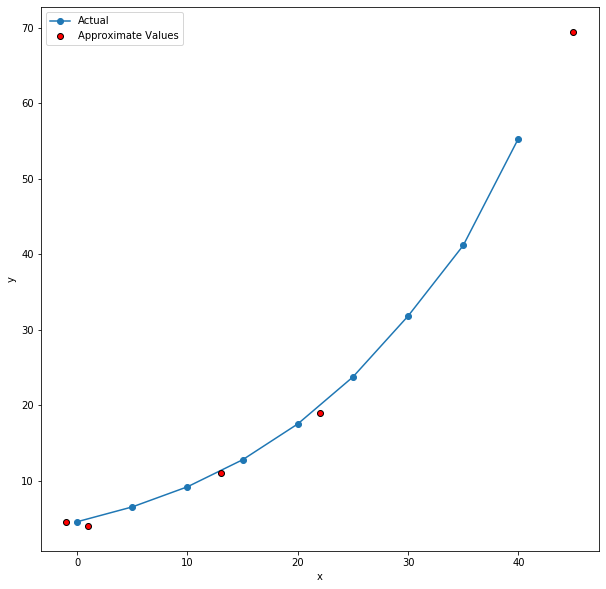

In [4]:
values = np.arange(0, 45, 5)
points = np.array([1, 13, 22])
fx = np.array([4.579, 6.543, 9.209, 12.788, 17.535, 23.756, 31.824, 41.175, 55.324])
approximations = np.zeros_like(points)
for i in range(np.size(approximations)):
    approximations[i] = NatCubicSpline(points[i], values, fx)

approx1 = Lagrange(values[0:1], fx[0:1], -1.0) # evaluate the linear lagrange polynomial at -1
approx2 = Lagrange(values[-2:], fx[-2:], 45.0) # evaluate the linear lagrange polynomial at 45


approximations = np.hstack((np.hstack((approx1, approximations)), approx2)) # append new values
points = np.hstack((np.hstack((np.array([-1]), points)), np.array([45])))

fig = plt.figure()
fig.set_size_inches(10, 10)
plt.plot(values, fx, 'o-', label='Actual')
plt.plot(points, approximations, 'ko', mfc='r', label='Approximate Values')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [5]:
approximations

array([ 4.579,  4.   , 11.   , 19.   , 69.473])